# INIT

## Import and Install

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import AgglomerativeClustering

## Read DataFrame and Select Columns

In [41]:
df = pd.read_csv('beers.csv')

In [42]:
df = df[['abv', 'ibu', 'style']]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     2348 non-null   object 
 1   ibu     1405 non-null   float64
 2   style   2405 non-null   object 
dtypes: float64(1), object(2)
memory usage: 56.6+ KB


In [44]:
null_values = df.isnull().sum()
null_values

abv        62
ibu      1005
style       5
dtype: int64

## Prepare Dataset

In [45]:
le = LabelEncoder()
df['style'] = le.fit_transform(df['style'])

In [46]:
for i in range(df.shape[0]):
    abv = str(df.loc[i, 'abv'])
    if(len(abv) > 6):
        abv = abv[:5]
    abv = float(abv)
    df.loc[i, 'abv'] = abv

## Fill NA values

In [47]:
df_dropped = df.dropna()
df_dropped.shape

(1405, 3)

In [48]:
df['abv'] = df['abv'].astype(float)
mean_abv = df['abv'].mean()
std_abv = df['abv'].std()

df['ibu'] = df['ibu'].astype(float)
mean_ibu = df['ibu'].mean()
std_ibu = df['ibu'].std()

for i in range(df.shape[0]):
    abv = str(df.loc[i, 'abv'])
    if(abv == 'nan'):
        abv = random.randrange(int(mean_abv - std_abv), int(mean_abv + std_abv))
        abv = float(abv)
        df.loc[i, 'abv'] = abv
        
    ibu = str(df.loc[i, 'ibu'])
    if(ibu == 'nan'):
        ibu = random.randrange(int(mean_ibu - std_ibu), int(mean_ibu + std_ibu))
        ibu = float(ibu)
        df.loc[i, 'ibu'] = ibu

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     2410 non-null   float64
 1   ibu     2410 non-null   float64
 2   style   2410 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 56.6 KB


In [49]:
def print_data_distribution(df):
    fig, axes = plt.subplots(1, 3, figsize=(14, 6))
    
    # Distribution plot for 'abv'
    sns.histplot(df['abv'], kde=True, ax=axes[0])
    axes[0].set_title('ABV Distribution')
    axes[0].set_xlabel('ABV')
    
    # Distribution plot for 'ibu'
    sns.histplot(df['ibu'], kde=True, ax=axes[1])
    axes[1].set_title('IBU Distribution')
    axes[1].set_xlabel('IBU')
    
    # Distribution plot for 'ibu'
    sns.histplot(df['style'], kde=True, ax=axes[2])
    axes[2].set_title('Style')
    axes[2].set_xlabel('Style')
    
    plt.tight_layout()
    plt.show()

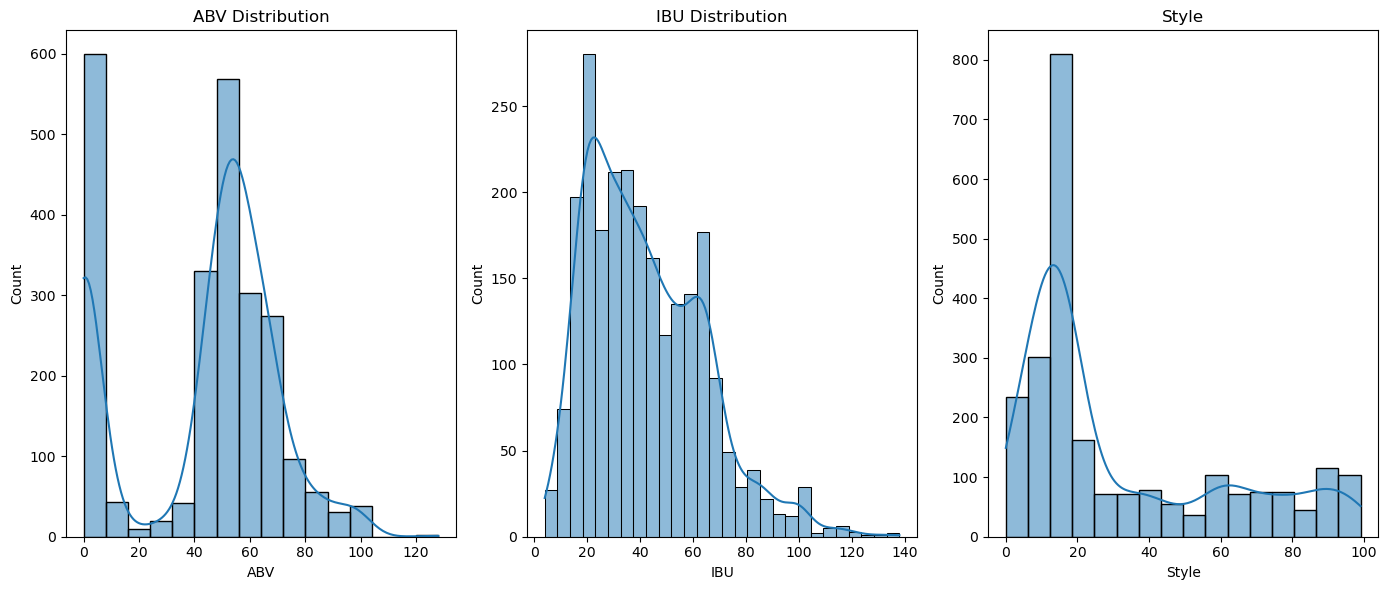

In [50]:
print_data_distribution(df)

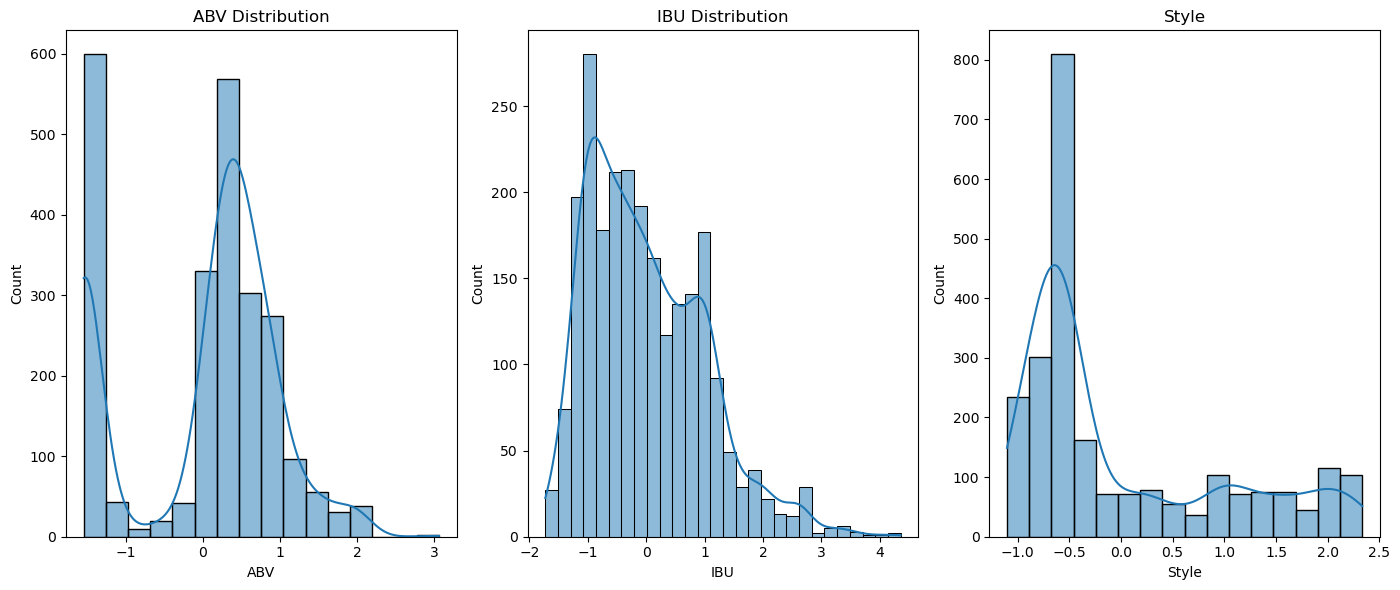

In [51]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
print_data_distribution(df)

### Data Visualization 3D

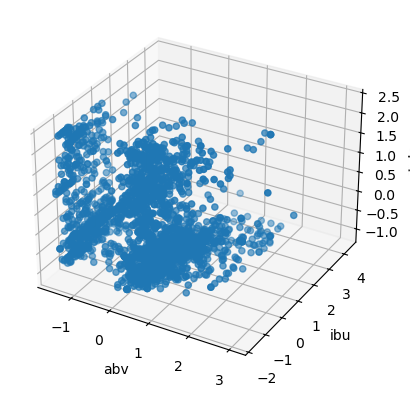

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['abv'], df['ibu'], df['style'])

# Definindo os rótulos dos eixos
ax.set_xlabel('abv')
ax.set_ylabel('ibu')
ax.set_zlabel('style')

# Exibindo o gráfico
plt.show()

### PCA

In [53]:
pca = PCA(n_components=2)
df_red = pca.fit_transform(df)

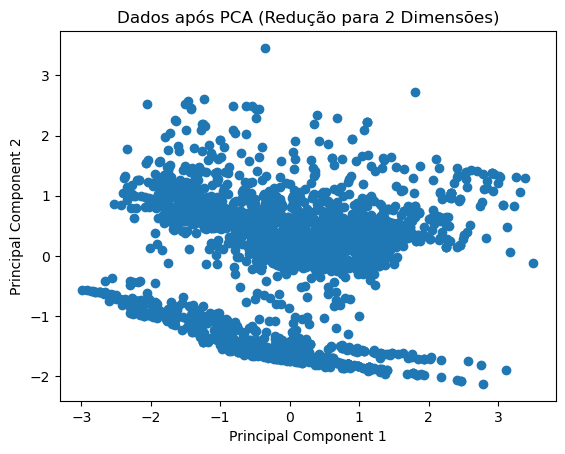

In [54]:
plt.scatter(df_red[:, 0], df_red[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dados após PCA (Redução para 2 Dimensões)')
plt.show()

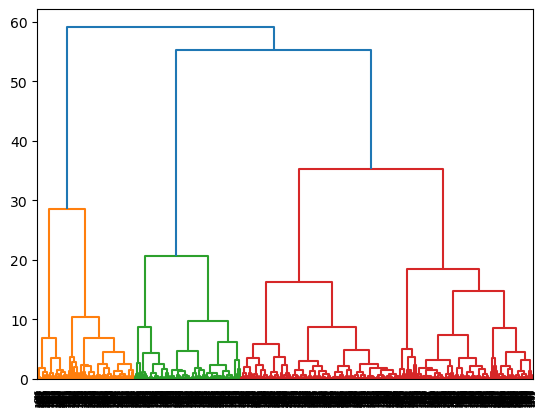

In [62]:
mergins = linkage(df_red, method='ward')
dendrogram(mergins)
plt.show()

#### Serão usados 3 clusters pois a linha horizontal traçada (no ponto 50, logo abaixo da maior linha horizontal do dendograma) corta 3 linhas verticais

### Gráficos Clusters

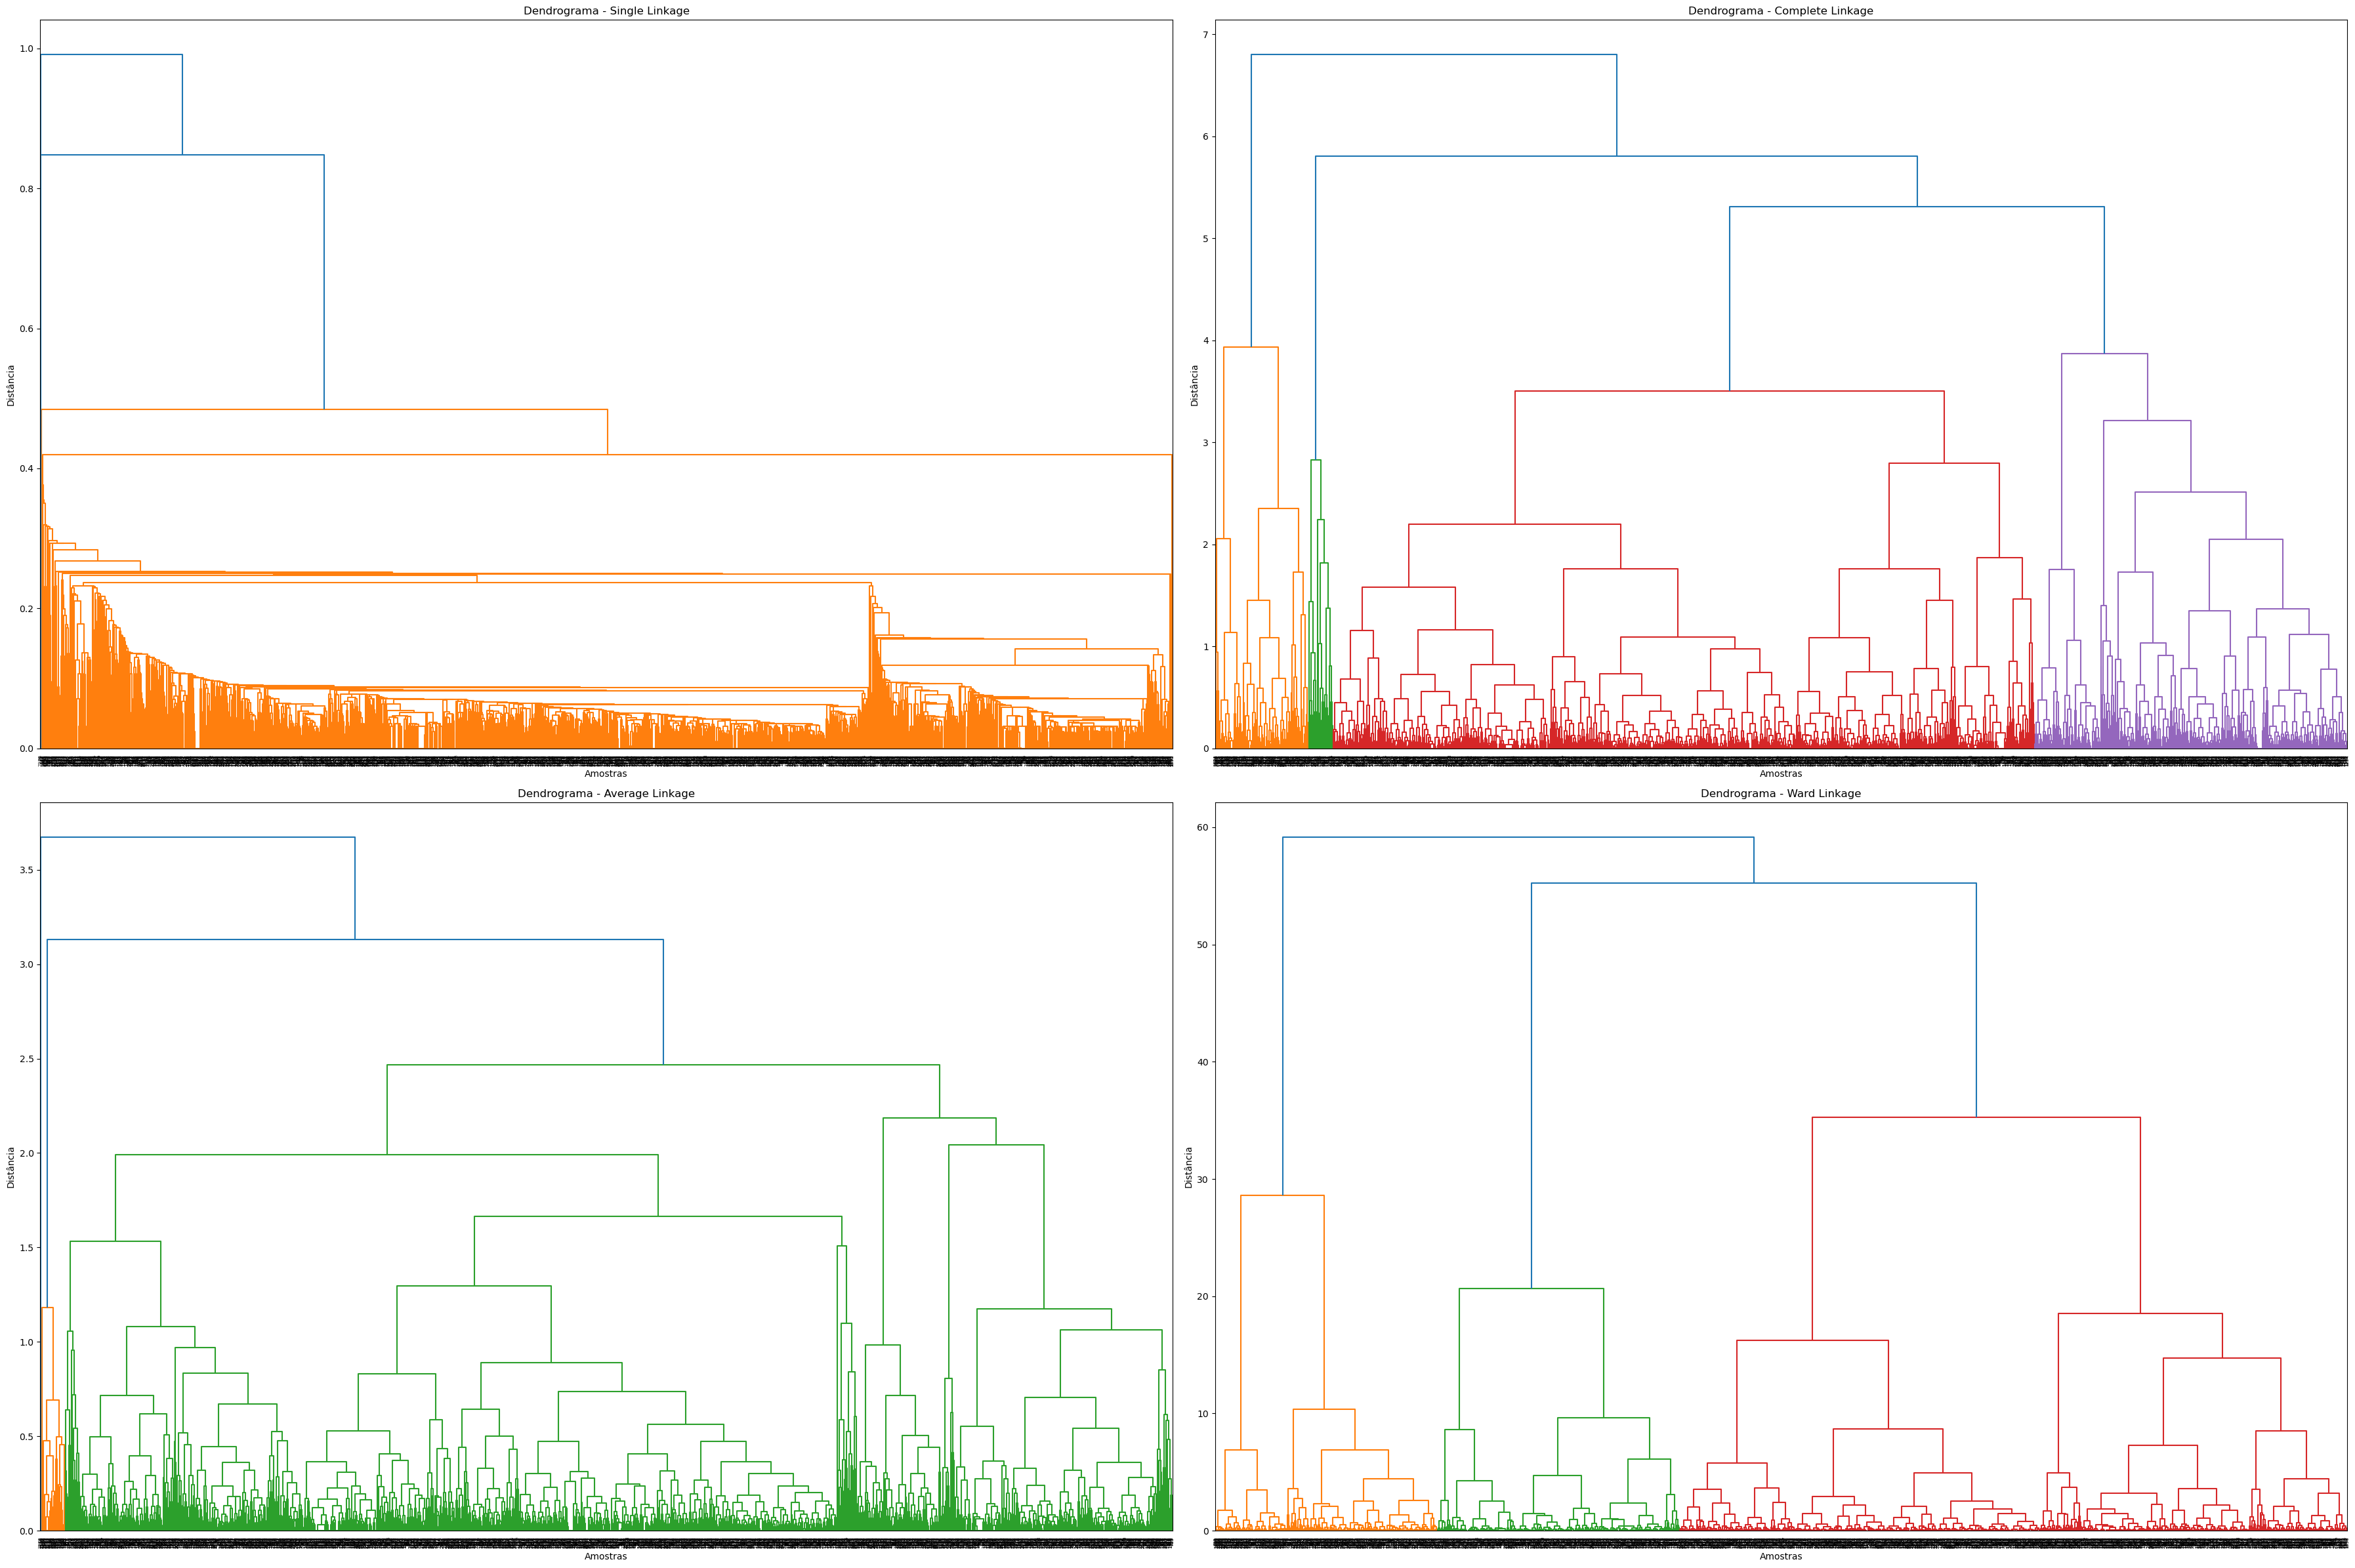

In [61]:
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(36, 24))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    linked = linkage(df_red, method=method)
    dendrogram(linked)
    plt.title(f'Dendrograma - {method.capitalize()} Linkage')
    plt.xlabel('Amostras')
    plt.ylabel('Distância')

# Ajustando o layout
plt.tight_layout()
plt.show()

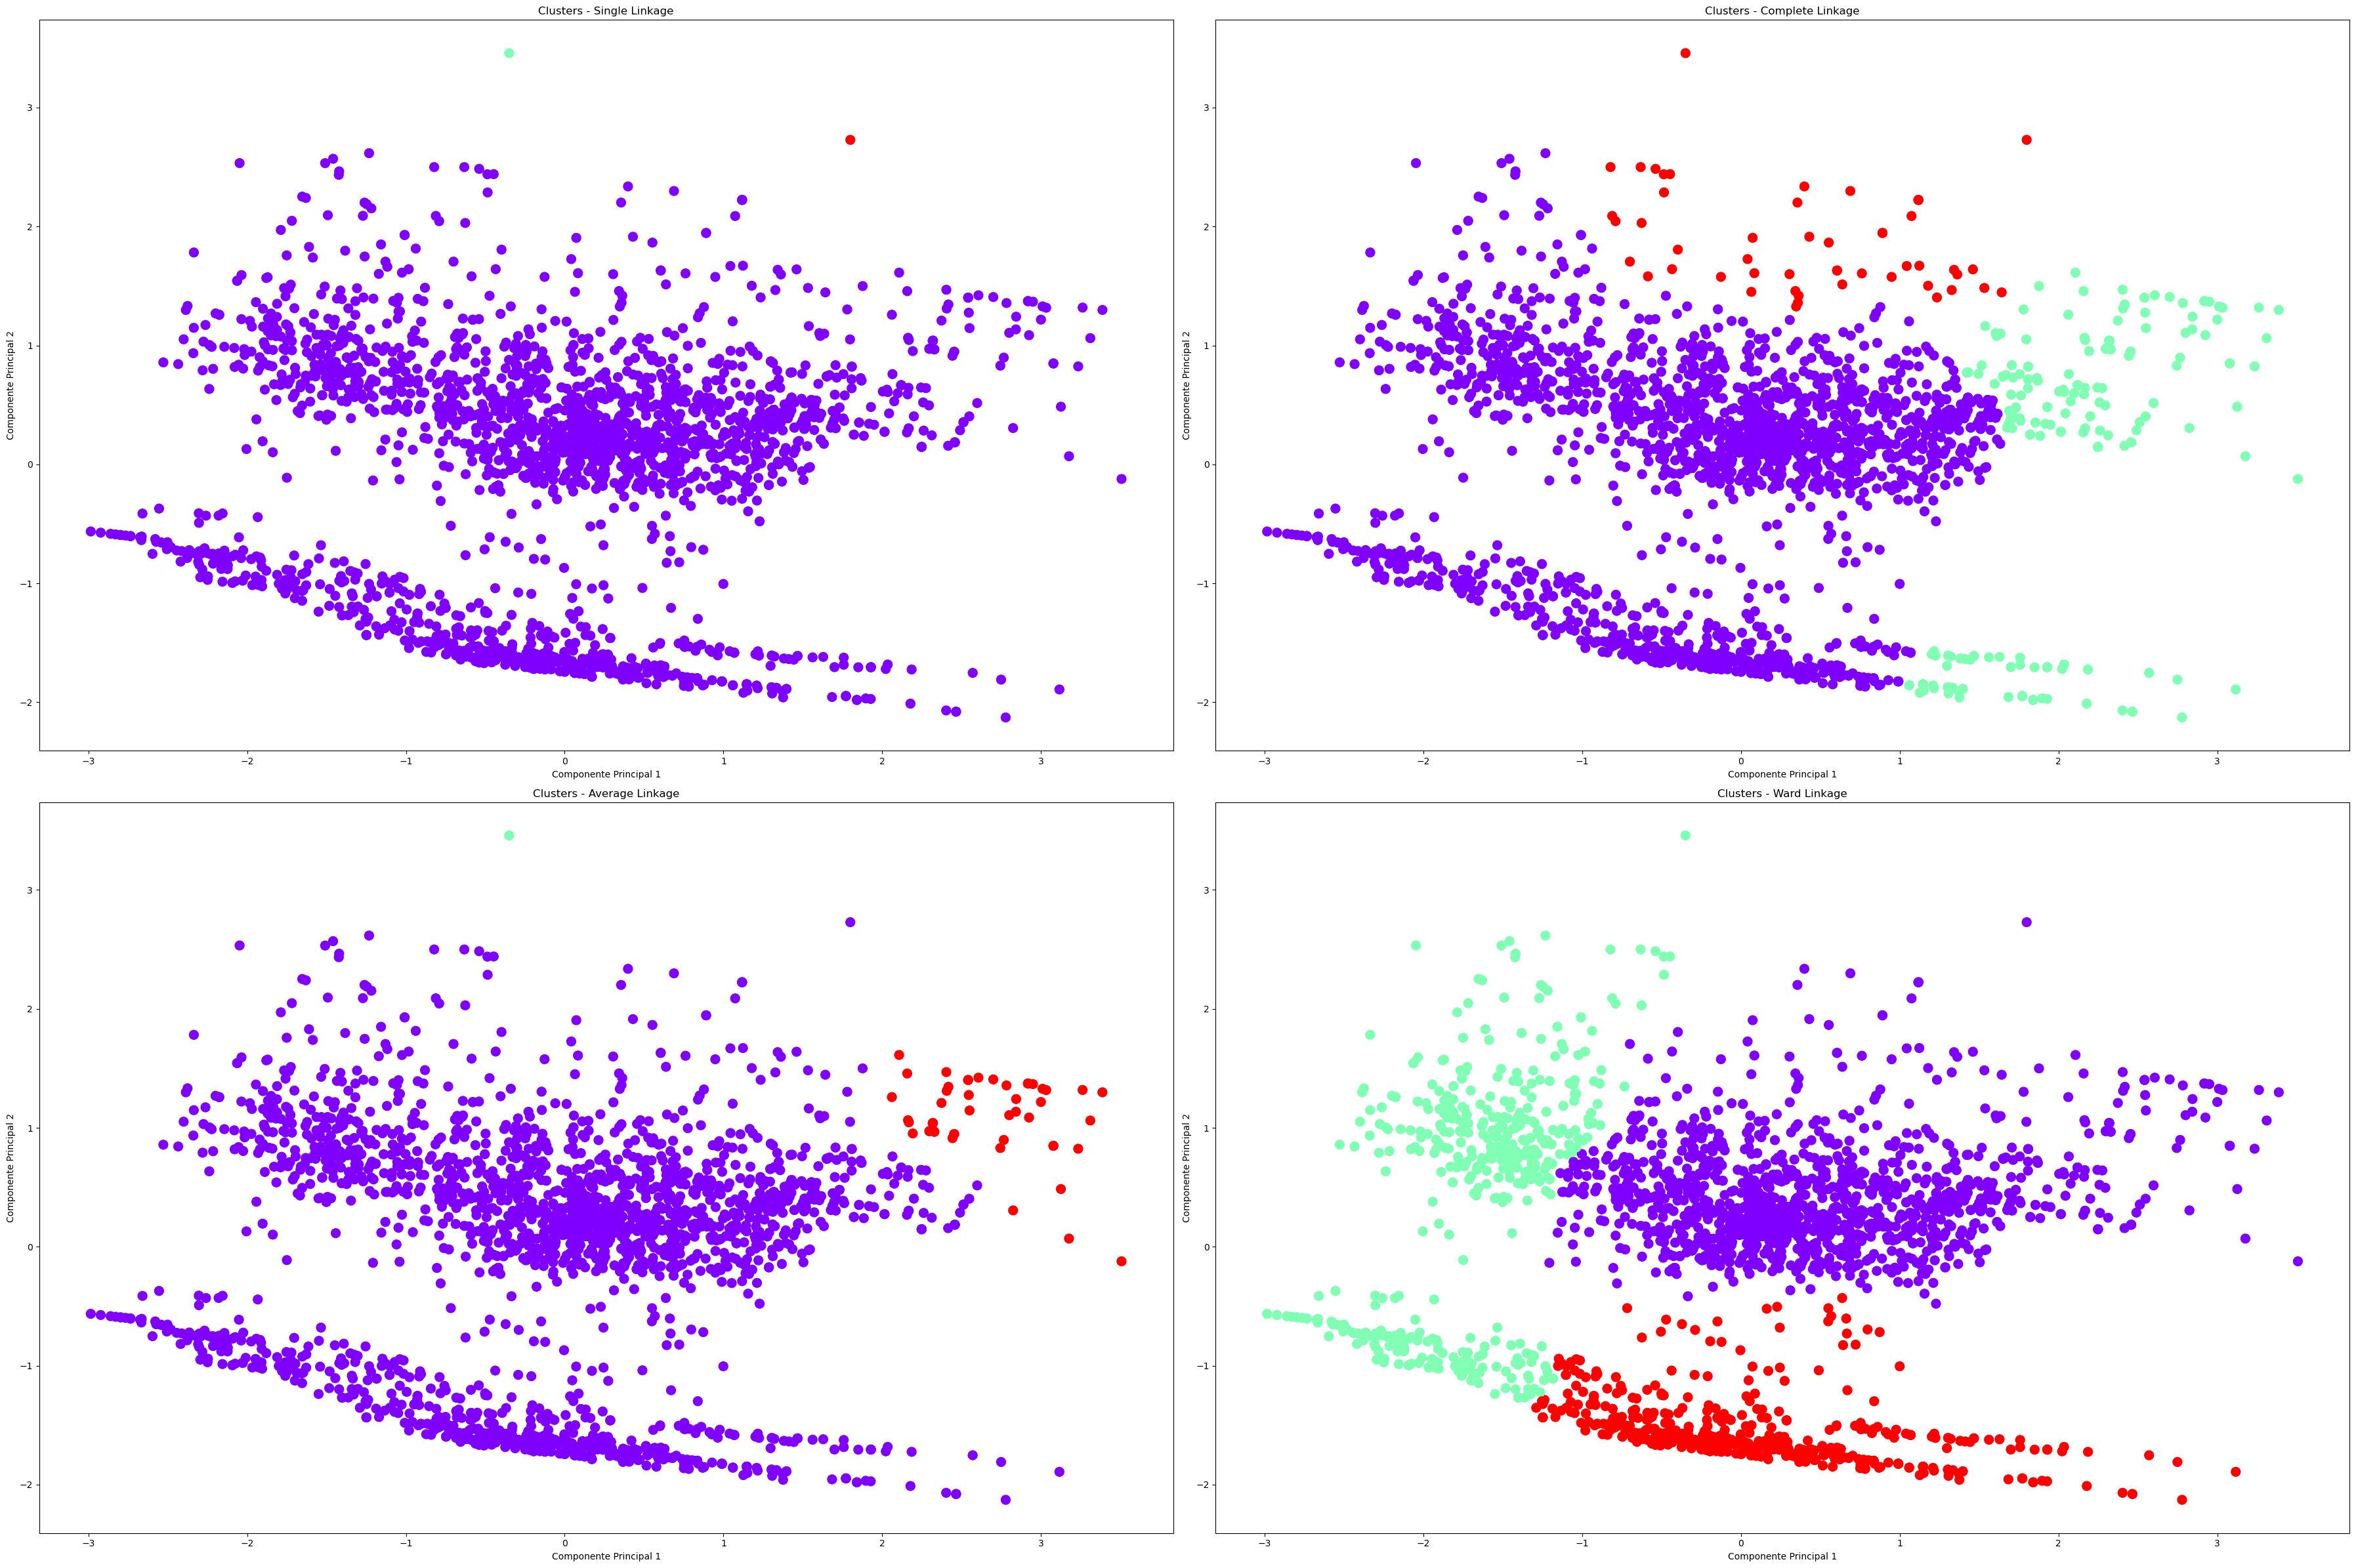

In [64]:
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(36, 24))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = clustering.fit_predict(df_red)
    
    plt.scatter(df_red[:, 0], df_red[:, 1], c=clusters, cmap='rainbow', s=100, marker='o')
    plt.title(f'Clusters - {method.capitalize()} Linkage')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()